In [1]:
#Libraries
import pandas as pd
import numpy as np
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import log

In [2]:
df = pd.read_csv(r'C:/Users/Jordan/Desktop/jupyter notebook/Dissertation Code/data_cleaned_and_Explored.csv')
df.head()

,Unnamed: 0,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype,c_o
0,0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0,6.887553
1,1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601
2,2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0,7.005789
3,3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0,6.887553
4,4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0,7.007601


In [3]:
df = df.drop(columns = {'manufacturer', 'model', 'description', 'extra_urban_metric', 'c_o'})

In [4]:
#25% Discrete

df['fuel_12k_miles'] = df['fuel_12k_miles'].apply(lambda x: 'Below 1142' if 0<=x<=1142 else 'Above 1142')

df['co'] = df['co'].apply(lambda x: '0-189' if 0<=x<=189 else '189+')

df['co2'] = df['co2'].apply(lambda x: '0-150' if 0<=x<150 else '150+')

df['engine_capacity'] = df['engine_capacity'].apply(lambda x: '0-1600' if 0<=x<=1600 else '1600+')

df['urban_metric'] = df['urban_metric'].apply(lambda x: '0-4.9' if 0<=x<=4.9 else '4.9+')

df['year'] = df['year'].apply(lambda x: '2000-2004' if 2000<=x<=2004 else '2005-2013')

df['euro_standard'] = df['euro_standard'].apply(lambda x: '2-3' if 2<=x<=3 else '4-6')

In [5]:
# #50% Discrete

# df['fuel_12k_miles'] = df['fuel_12k_miles'].apply(lambda x: 'Below 1376' if 0<=x<=1376 else 'Above 1376')

# df['co'] = df['co'].apply(lambda x: '0-302' if 0<=x<=302 else '302+')

# df['co2'] = df['co2'].apply(lambda x: '0-180' if 0<=x<180 else '180+')

# df['engine_capacity'] = df['engine_capacity'].apply(lambda x: '0-2000' if 0<=x<=2000 else '2000+')

# df['urban_metric'] = df['urban_metric'].apply(lambda x: '0-9.8' if 0<=x<=9.8 else '9.8+')

# df['year'] = df['year'].apply(lambda x: '2000-2008' if 2000<=x<=2008 else '2009-2013')

# df['euro_standard'] = df['euro_standard'].apply(lambda x: '2-4' if 2<=x<=4 else '5-6')

In [6]:
# #75% Discrete

# df['fuel_12k_miles'] = df['fuel_12k_miles'].apply(lambda x: 'Below 1680' if 0<=x<=1680 else 'Above 1680')

# df['co'] = df['co'].apply(lambda x: '0-480' if 0<=x<=480 else '480+')

# df['co2'] = df['co2'].apply(lambda x: '0-218' if 0<=x<218 else '218+')

# df['engine_capacity'] = df['engine_capacity'].apply(lambda x: '0-2400' if 0<=x<=2400 else '2400+')

# df['urban_metric'] = df['urban_metric'].apply(lambda x: '0-12.4' if 0<=x<=12.4 else '12.4+')

# df['year'] = df['year'].apply(lambda x: '2000-2011' if 2000<=x<=2011 else '2012-2013')

# df['euro_standard'] = df['euro_standard'].apply(lambda x: '2-5' if 2<=x<=5 else '6')

In [7]:
df.head()

,Unnamed: 0,year,euro_standard,engine_capacity,urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,0,2000-2004,2-3,0-1600,4.9+,150+,189+,Above 1142,0,0
1,1,2000-2004,2-3,1600+,4.9+,150+,189+,Above 1142,0,0
2,2,2000-2004,2-3,1600+,4.9+,150+,189+,Above 1142,0,0
3,3,2000-2004,2-3,0-1600,4.9+,150+,189+,Above 1142,0,0
4,4,2000-2004,2-3,1600+,4.9+,150+,189+,Above 1142,0,0


In [8]:
dfhot, dfnum = bn.df2onehot(df)

 30%|████████████████████████▉                                                          | 3/10 [00:00<00:00, 16.48it/s]


[df2onehot] >Auto detecting dtypes.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 83.66it/s]

[df2onehot] >Set dtypes in dataframe..
[df2onehot] >Total onehot features: 21


Building tree: 100%|███████████████████████████████████████████████████████████████| 36/36.0 [00:00<00:00, 1728.11it/s]


[bnlearn] >Computing best DAG using [cl]
[bnlearn] >Plot based on BayesianModel


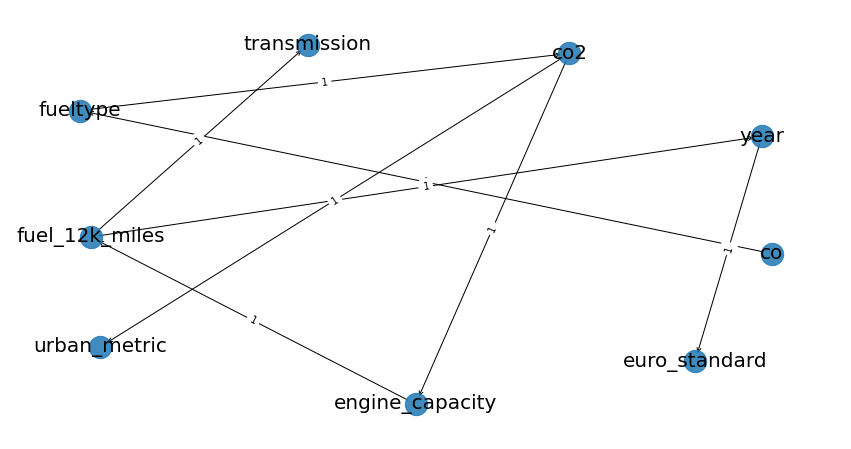

In [9]:
DAG = bn.structure_learning.fit(dfnum, methodtype='cl', root_node='co')

# Plot
G = bn.plot(DAG)

In [10]:
model = bn.parameter_learning.fit(DAG, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of co:
+-------+----------+
| co(0) | 0.256726 |
+-------+----------+
| co(1) | 0.743274 |
+-------+----------+
[bnlearn] >CPD of fueltype:
+-------------+----------------------+-----------------------+
| co          | co(0)                | co(1)                 |
+-------------+----------------------+-----------------------+
| fueltype(1) | 0.21122196640231944  | 0.7392200754005656    |
+-------------+----------------------+-----------------------+
| fueltype(2) | 0.7561183593416901   | 0.2478499057492931    |
+-------------+----------------------+-----------------------+
| fueltype(3) | 0.015263920866376738 | 0.004977615457115929  |
+-------------+----------------------+-----------------------+
| fueltype(4) | 0.008527330092947897 | 0.004476908576814326  |
+-------------+----------------------+-----------------------+
| fueltype(5) | 0.008868423296665814

In [11]:
query = bn.inference.fit(model, variables=['engine_capacity'], evidence={'co': True})
print(query)
print(query.df)

Eliminating: co2: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1568.22it/s]

[bnlearn] >Variable Elimination..
+--------------------+------------------------+
| engine_capacity    |   phi(engine_capacity) |
+====================+========================+
| engine_capacity(0) |                 0.2566 |
+--------------------+------------------------+
| engine_capacity(1) |                 0.7434 |
+--------------------+------------------------+
+--------------------+------------------------+
| engine_capacity    |   phi(engine_capacity) |
+====================+========================+
| engine_capacity(0) |                 0.2566 |
+--------------------+------------------------+
| engine_capacity(1) |                 0.7434 |
+--------------------+------------------------+
   engine_capacity        p
0                0  0.25659
1                1  0.74341


In [12]:
bn.print_CPD(model)

CPD of co:
+-------+----------+
| co(0) | 0.256726 |
+-------+----------+
| co(1) | 0.743274 |
+-------+----------+
CPD of fueltype:
+-------------+----------------------+-----------------------+
| co          | co(0)                | co(1)                 |
+-------------+----------------------+-----------------------+
| fueltype(1) | 0.21122196640231944  | 0.7392200754005656    |
+-------------+----------------------+-----------------------+
| fueltype(2) | 0.7561183593416901   | 0.2478499057492931    |
+-------------+----------------------+-----------------------+
| fueltype(3) | 0.015263920866376738 | 0.004977615457115929  |
+-------------+----------------------+-----------------------+
| fueltype(4) | 0.008527330092947897 | 0.004476908576814326  |
+-------------+----------------------+-----------------------+
| fueltype(5) | 0.008868423296665814 | 0.0034754948162111217 |
+-------------+----------------------+-----------------------+
CPD of co2:
+----------+---------------------+--

[bnlearn] >Plot based on BayesianModel


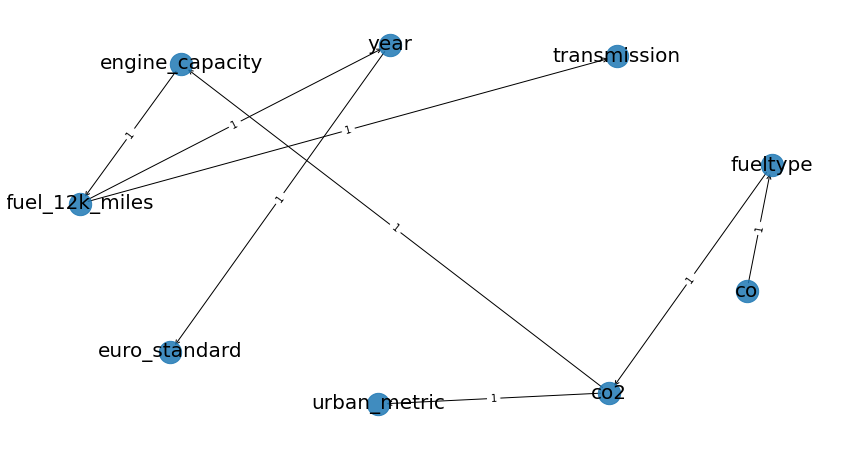

Generating for node: co2:   0%|                                                                  | 0/9 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 10000 samples..


Generating for node: euro_standard: 100%|████████████████████████████████████████████████| 9/9 [00:00<00:00, 70.06it/s]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Plot based on BayesianModel
[bnlearn] >Existing coordinates from <pos> are used.


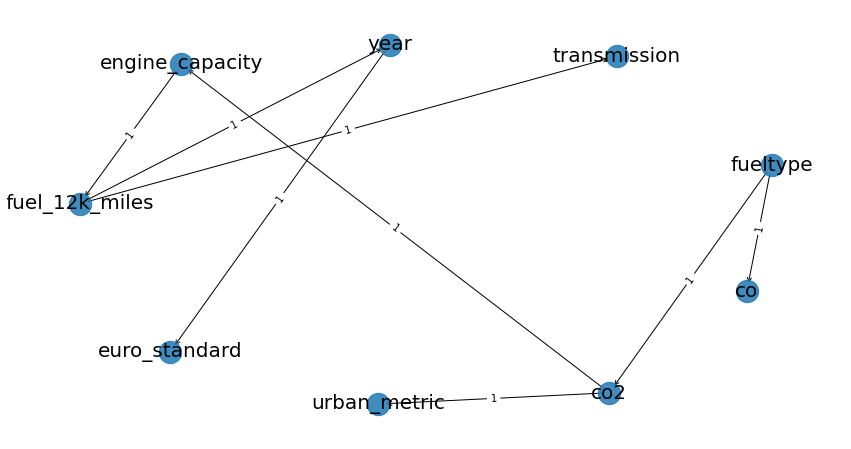

[bnlearn] >Existing coordinates from <pos> are used.


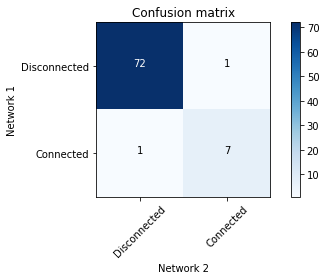

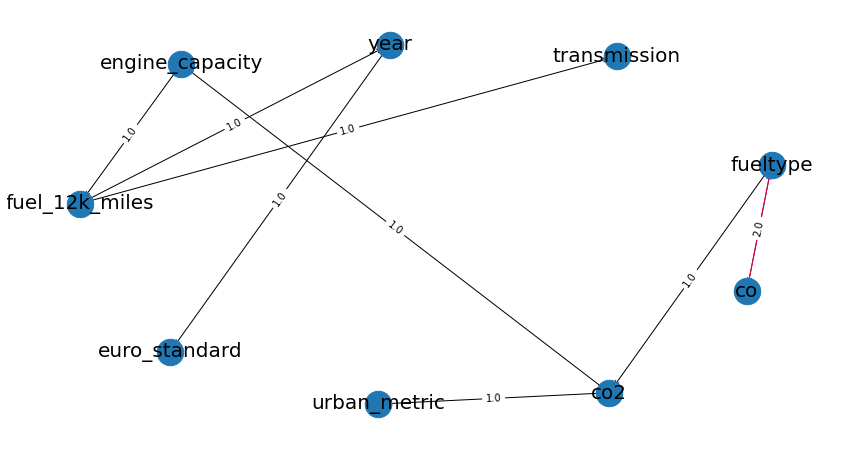

(array([[72,  1],
        [ 1,  7]], dtype=int64),
 target           co  fueltype  co2  engine_capacity  urban_metric  \
 source                                                              
 co                0        -1    0                0             0   
 fueltype          2         0    1                0             0   
 co2               0         0    0                1             1   
 engine_capacity   0         0    0                0             0   
 urban_metric      0         0    0                0             0   
 fuel_12k_miles    0         0    0                0             0   
 year              0         0    0                0             0   
 transmission      0         0    0                0             0   
 euro_standard     0         0    0                0             0   
 
 target           fuel_12k_miles  year  transmission  euro_standard  
 source                                                              
 co                            0     

In [13]:
# plot ground truth
G = bn.plot(model)
# Sampling
df = bn.sampling(model, n=10000)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])
# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

In [25]:
Xtest = bn.sampling(model, n=1000)
Xtest = Xtest[['co2', 'urban_metric', 'engine_capacity', 'fuel_12k_miles']]
print(Xtest)

Generating for node: euro_standard: 100%|███████████████████████████████████████████████| 9/9 [00:00<00:00, 442.58it/s]

[bnlearn] >Forward sampling for 1000 samples..
     co2  urban_metric  engine_capacity  fuel_12k_miles
0      1             1                1               1
1      1             1                0               0
2      1             1                0               1
3      1             1                1               0
4      1             1                1               0
..   ...           ...              ...             ...
995    1             1                1               0
996    1             1                1               0
997    0             1                0               0
998    1             1                1               0
999    1             1                1               0

[1000 rows x 4 columns]


In [26]:
Pred = bn.predict(model, Xtest, variables=['co2', 'engine_capacity', 'urban_metric'])
print(Pred)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 118.60it/s]

[bnlearn]> Remaining columns for inference: 1
     engine_capacity  co2  urban_metric         p
0                  1    1             1  0.426578
1                  1    1             1  0.684104
2                  1    1             1  0.426578
3                  1    1             1  0.684104
4                  1    1             1  0.684104
..               ...  ...           ...       ...
995                1    1             1  0.684104
996                1    1             1  0.684104
997                1    1             1  0.684104
998                1    1             1  0.684104
999                1    1             1  0.684104

[1000 rows x 4 columns]


In [27]:
MSE = metrics.mean_squared_error(Xtest, Pred)*100
print(MSE)

20.392044937081298


In [28]:
n = len(Xtest)

In [29]:
bic =  n * log(MSE) - 3 * log(n)    #2 is number of params of X 
bic

2994.421604896724